# Table of Contents in Data

### Introduction and Motivations
Table of Contents (TOCs) are a core method of **chunking** vast domains of knowledge and information. 

They aren't the only method (headings, topics, mind-maps, courses, stories and so on), but I hypothesise that they can be very effective. The structure of knowledge is of particular importance to those who must efficiently and effectively understand core concepts and for those who prefer to get a broad lay of the land, before jumping into more specific detail. It is also notable that every concept can be expanded – that is, anyone should theoretically be able to devote many lifetimes to the exploration of any subject, word, or even idea or concept imaginable, because every concept has infinite connections and we are finite.

The context of this lab, on the experiences of the author, is based on exploration and experimentation. He is mostly driven by personal motivations, overlayed by the desire to practice machine learning and AI in the context of the personal problem of learning about all fields as efficiently as possible, as a relative novice in the CS field and ML practice.

### Sections
1. Data Collection 
2. Data Initial Analysis, Preprocessing  
3. Text Pre-Processing
3. Data Exploration
4. Possible Machine Modelling, Next Steps

### Data Collection
In order to attain the data for this experiment, we will use the 737 book entries in the [Very Short Introductions](https://global.oup.com/academic/content/series/v/very-short-introductions-vsi/?type=listing&lang=en&cc=au) series and their Table of Contents (TOCs) which are publicly available under each book page. This section will primarily entail my learning and implementation of web scraping.

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd 

In [2]:
# Function for getting data for a test example
def get_TOC(url): 
    page = urlopen(url)
    html = page.read().decode("utf-8")
    soup = BeautifulSoup(html, "html.parser")
    
    title = soup.find("h1", "product_biblio_title").getText()
    overview = soup.find("h3", "product_biblio_series_heading").find_next("ul").getText()
    try:
        TOC = soup.find("h2", string="Table of Contents").find_next("p").get_text()
        return {'title': title, 'overview': overview, 'toc': TOC}
    except:
        print(f"There was an error with this entry's TOC: {title}.")
        return {'title': title, 'overview': overview, 'toc': ''}

url = "https://global.oup.com/academic/product/bestsellers-a-very-short-introduction-9780199214891" + \
      "?type=listing&prevSortField=1&sortField=1&resultsPerPage=737&lang=en&cc=au"
get_TOC(url)

There was an error with this entry's TOC: Bestsellers: A Very Short Introduction.


{'title': 'Bestsellers: A Very Short Introduction',
 'overview': "\nJohn Sutherland argues that bestseller lists monitor one of the strongest pulses in modern literature and are therefore worthy of serious study.\nAsks what separates bestsellers from canonical fiction, why some critically-acclaimed novels never make it, and examines what bestsellers reveal about both literary culture and society.\nLifts the lid on the 'bestseller industry', and examines what makes a book into a bestseller.\nIncludes lively summaries of bestsellers over the years - including both classic and contemporary novels, alongside some surprising titles and long-forgotten names.\nGone with the Wind, Lady Chatterley's Lover, The Blue Lagoon, Portnoy's Complaint and The Da Vinci Code - these are just some of the bestselling titles that Sutherland discusses.\n",
 'toc': ''}

In [3]:
# A test example for collecting titles of a page of the texts
def get_links(url):
    page = urlopen(url)
    html = page.read().decode("utf-8")
    soup = BeautifulSoup(html, "html.parser")

    book_urls = ["https://global.oup.com" + link.find("a").get('href') for link in soup.find_all("td", "result_biblio")]
    return(book_urls)

# number of results can be edited in url params("resultsPerPage=__") from 1-737
url = "https://global.oup.com/academic/content/series/v/very-short-introductions-vsi/" + \
     "?type=listing&prevSortField=1&sortField=1&resultsPerPage=2&start=0"
get_links(url)

['https://global.oup.com/academic/product/abolitionism-9780190213220?type=listing&prevSortField=1&sortField=1&resultsPerPage=2&lang=en&cc=au',
 'https://global.oup.com/academic/product/accounting-a-very-short-introduction-9780199684311?type=listing&prevSortField=1&sortField=1&resultsPerPage=2&lang=en&cc=au']

In [16]:
# Now iterating over each url and pulling out all the table of contents data
index = 0
rows = []
url = "https://global.oup.com/academic/content/series/v/very-short-introductions-vsi/" + \
      "?type=listing&prevSortField=1&sortField=1&resultsPerPage=737&start=0"

for url in get_links(url):
    index += 1
    details = get_TOC(url)
    rows.append([details.get('title'), details.get('overview'), details.get('toc')])
    print(f"Successfully added entry {index}: {details.get('title')}.")

df = pd.DataFrame(rows, columns=["Title", "Overview", "TOC"])

Successfully added entry 1: Abolitionism.
Successfully added entry 2: Accounting: A Very Short Introduction.
Successfully added entry 3: Adam Smith: A Very Short Introduction.
Successfully added entry 4: Adolescence: A Very Short Introduction.
Successfully added entry 5: Advertising: A Very Short Introduction.
Successfully added entry 6: Aerial Warfare: A Very Short Introduction.
Successfully added entry 7: Aesthetics: A Very Short Introduction.
Successfully added entry 8: African American Religion: A Very Short Introduction.
Successfully added entry 9: African History: A Very Short Introduction.
Successfully added entry 10: African Politics: A Very Short Introduction.
Successfully added entry 11: African Religions: A Very Short Introduction.
Successfully added entry 12: Ageing: A Very Short Introduction.
Successfully added entry 13: Agnosticism: A Very Short Introduction.
Successfully added entry 14: Agriculture: A Very Short Introduction.
Successfully added entry 15: Albert Camus: A 

In [ ]:
df.to_csv("toc_data.csv", index=False)

print("Your data has been saved.")
df.tail(2)

If you wish to reuse this code, bear in mind that the soup.find() functions will need to be adapted to the specific website being scraped.

### Data Initial Analysis and Preprocessing

In [5]:
data = pd.read_csv("/Users/Macbook/Desktop/Python Scripts/toc_data.csv")
print("Shape of data: ", data.shape)
data.head(2)

Shape of data:  (737, 3)


,Title,Overview,TOC
0,Abolitionism,\nA short narrative of antislavery struggles i...,List of Illustrations Preface Ch. 1 First Free...
1,Accounting: A Very Short Introduction,\nExamines the key concepts and the main types...,1:Introduction 2:How accounting has developed ...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     737 non-null    object
 1   Overview  737 non-null    object
 2   TOC       707 non-null    object
dtypes: object(3)
memory usage: 17.4+ KB


In [7]:
data[data.isna().any(axis=1)]

,Title,Overview,TOC
75,Bestsellers: A Very Short Introduction,\nJohn Sutherland argues that bestseller lists...,NaN
76,Biblical Archaeology: A Very Short Introduction,\nThis topic has broad general appeal. Televis...,NaN
151,Cryptography: A Very Short Introduction,\nThe authors are both experts in the theory a...,NaN
159,Democracy: A Very Short Introduction,\nA lively and accessible guide to the history...,NaN
163,Descartes: A Very Short Introduction,\nThe best introduction to Descartes aimed at ...,NaN
172,Documentary Film: A Very Short Introduction,"\nA lively, compact, introduction to documenta...",NaN
178,Early Music: A Very Short Introduction,\nA unique and succinct survey of both the his...,NaN
218,Film Music: A Very Short Introduction,"\nAn affordable, compact, and engaging book by...",NaN
223,Folk Music: A Very Short Introduction,\nThe first short introduction to folk music w...,NaN
296,Ideology: A Very Short Introduction,\nA clear presentation of the controversies su...,NaN


30/737 (4%) of books received no Table of Contents. I am immeasurably disappointed and my day is ruined. I would guess that a proportion of these are mostly older books, or they somehow slipped through the cracks of providing a TOC in the particular database in which I sourced the data. A quick look at the titles without TOCs bears no simple direct pattern, however, the presence of several religion topics (~ 1/3) might point to a similar author writing those volumes. For this analysis, these 30 volumes without TOCs will be excluded from the dataset to yield 707 total values.

In [8]:
data_full = data.dropna(axis=0, subset=['TOC'])
data_full = data_full.reset_index(drop=True)
print("Shape of data: ", data_full.shape)
data_full.tail()

Shape of data:  (707, 3)


,Title,Overview,TOC
702,World Music: A Very Short Introduction,\nPresents world music in its full historical ...,Preface 1:In the beginning: myth and meaning i...
703,World Mythology,\nComprehensively collects myths in a way not ...,List of Illustrations Definitions 1 Deity 2 Cr...
704,World War II: A Very Short Introduction,\nWritten by an internationally recognized aut...,1:The Inter-war years 2:The Second World War b...
705,Writing and Script: A Very Short Introduction,\nAn appetizing first taste of the subject of ...,1:Writing and its emergence 2:Development and ...
706,Zionism: A Very Short Introduction,\nOffers an unbiased assessment of Zionism and...,CHAPTER 1: INTRODUCTION CHAPTER 2: MODERN JEWI...


In [9]:
data_full[data_full['Title'].duplicated()]

,Title,Overview,TOC
29,American Political Parties and Elections: A Ve...,\nL. Sandy Maisel is one of the best known and...,1 The context of American elections and politi...
468,Poststructuralism: A Very Short Introduction,"\nIntroduces the basics, taking nothing for gr...",Preface by Neil Badmington 1:Creatures of diff...
531,Social and Cultural Anthropology: A Very Short...,"\n'A very good idea, these Very Short Introduc...",1. Fieldwork and Ethnography; 2. Culture; 3. S...
659,The U.S. Congress: A Very Short Introduction,\nWritten by one of the leading authorities on...,Preface 1 The great compromise 2 Campaigns and...


In [ ]:
# saving to a separate file
df.to_csv("toc_data_html.csv", index=False)
print("Your data has been saved.")

In [10]:
data = pd.read_csv("/Users/Macbook/Desktop/Python Scripts/toc_data_html.csv")
print("Shape of data: ", data.shape)
data.tail(1)

Shape of data:  (707, 3)


,Title,Overview,TOC
706,Zionism: A Very Short Introduction,\nOffers an unbiased assessment of Zionism and...,<p>CHAPTER 1: INTRODUCTION<br/> CHAPTER 2: MOD...


### Text Pre-Processing

In [11]:
import numpy as np
from collections import Counter

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt

Text Pre-Processing is necessary for most further analysis. Steps for Text Pre-Processing from from [Michael Fuchs' Github](https://github.com/MFuchs1989/Datasets-and-Miscellaneous/blob/main/datasets/NLP/Text%20Pre-Processing%20-%20All%20in%20One/text_pre_processing.py)
1. Text Cleaning
2. Tokenization
3. Stop Words
4. Normalization
5. Removing Single Characters

In [12]:
# Changing the case to lower
data.Title = data.Title.str.lower()
data.Overview = data.Overview.str.lower()
data.TOC = data.TOC.str.lower()

In [13]:
# Removes all punctuation, html tags... from a string, if present -> new column
def remove_punctuation_func(text):
    return re.sub(r'[^a-zA-Z0-9]', ' ', text)

def remove_html_tags_func(text):
    return BeautifulSoup(text, 'html.parser').get_text()

import unicodedata
def remove_accented_chars_func(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

def remove_irr_char_func(text):
    return re.sub(r'[^a-zA-Z]', ' ', text)

def remove_extra_whitespaces_func(text):
    return re.sub(r'^\s*|\s\s*', ' ', text).strip()

data['clean_TOC'] = data['TOC'].apply(remove_html_tags_func)
data['clean_TOC'] = data['clean_TOC'].apply(remove_accented_chars_func)
data['clean_TOC'] = data['clean_TOC'].apply(remove_punctuation_func)
data['clean_TOC'] = data['clean_TOC'].apply(remove_irr_char_func)
data['clean_TOC'] = data['clean_TOC'].apply(remove_extra_whitespaces_func)

In [14]:
# Tokenizes data by separating each word -> new column
data['tokenized_TOC'] = data['clean_TOC'].apply(word_tokenize)

In [15]:
# Default English stopwords
stopwords = nltk.corpus.stopwords.words('english')
STOPWORDS = ["br", "read", "reading", "index", "chapter", "ch", "reference", "references", "introduction", "preface", 
             "list", "conclusion", "illustrations", "epilogue", "glossary", "acknowledgements"]
stopwords = stopwords + STOPWORDS

In [16]:
# Removes Stop Words (also capitalized) from a string, if present -> new column
def remove_english_stopwords_func(text):
    t = [token for token in text if token.lower() not in stopwords]
    text = ' '.join(t)    
    return text

data['nostop_TOC'] = data['tokenized_TOC'].apply(remove_english_stopwords_func)

In [17]:
# Lemmatize tokens from string -> new column
def norm_lemm_v_a_func(text):
    words1 = word_tokenize(text)
    text1 = ' '.join([WordNetLemmatizer().lemmatize(word, pos='v') for word in words1])
    words2 = word_tokenize(text1)
    text2 = ' '.join([WordNetLemmatizer().lemmatize(word, pos='a') for word in words2])
    return text2

data['lemmatized_TOC'] = data['nostop_TOC'].apply(norm_lemm_v_a_func)

In [18]:
# Removes single characters from string, if present -> new column
def remove_single_char_func(text, threshold=1):
    threshold = threshold
    words = word_tokenize(text)
    text = ' '.join([word for word in words if len(word) > threshold])
    return text
data['nosingchar_TOC'] = data['lemmatized_TOC'].apply(remove_single_char_func)

In [19]:
data.head(2).T

,0,1
Title,abolitionism,accounting: a very short introduction
Overview,\na short narrative of antislavery struggles i...,\nexamines the key concepts and the main types...
TOC,<p>list of illustrations<br/> preface<br/> ch....,<p>1:introduction<br/> 2:how accounting has de...
clean_TOC,list of illustrations preface ch first freedom...,introduction how accounting has developed inte...
tokenized_TOC,"[list, of, illustrations, preface, ch, first, ...","[introduction, how, accounting, has, developed..."
nostop_TOC,first freedoms abolitionist movement revolutio...,accounting developed internationally time fund...
lemmatized_TOC,first freedoms abolitionist movement revolutio...,account develop internationally time fundament...
nosingchar_TOC,first freedoms abolitionist movement revolutio...,account develop internationally time fundament...


### Data Exploration

The TOCs in this dateset of books mostly all have simple 1-level hierarchies (which I would reserve as a good idea for the 'Very Short Introductions' series, but not particularly good for further exploration of the potential of TOCs). Though, the TOCs of these books are notable _because_ they are the most simple example of a concept structure.

Having taken out the entries without TOCs, the remaining 707 TOC data can be fruitfully analysed mostly in terms of word frequencies. Also the average number of "<br/.>"s can be explored to indicate the number of points under each TOC.
1. Most common Words in all TOCs
2. Number of Entries in each TOC

In [20]:
Counter(" ".join(data["nostop_TOC"]).split()).most_common(50)

[('world', 114),
 ('history', 104),
 ('life', 101),
 ('future', 94),
 ('war', 90),
 ('new', 75),
 ('law', 73),
 ('politics', 70),
 ('modern', 69),
 ('origins', 54),
 ('culture', 48),
 ('philosophy', 48),
 ('time', 47),
 ('social', 43),
 ('making', 42),
 ('society', 41),
 ('global', 40),
 ('science', 40),
 ('human', 40),
 ('art', 38),
 ('work', 37),
 ('nature', 37),
 ('religion', 36),
 ('revolution', 36),
 ('american', 35),
 ('early', 35),
 ('political', 35),
 ('matter', 35),
 ('past', 34),
 ('god', 34),
 ('theory', 32),
 ('power', 32),
 ('people', 31),
 ('language', 31),
 ('development', 30),
 ('empire', 30),
 ('age', 29),
 ('first', 28),
 ('earth', 28),
 ('change', 28),
 ('present', 27),
 ('century', 27),
 ('ethics', 27),
 ('climate', 27),
 ('music', 27),
 ('chronology', 26),
 ('writing', 26),
 ('big', 26),
 ('state', 26),
 ('evolution', 25)]

In [21]:
text_corpus = data['nosingchar_TOC'].str.cat(sep=' ')
# Returns a DataFrame with the most commonly used words from a text with their frequencies
from nltk.probability import FreqDist
def most_common_word_func(text, n_words=35):
    words = word_tokenize(text)
    fdist = FreqDist(words) 
    n_words = n_words
    df_fdist = pd.DataFrame({'Word': fdist.keys(), 'Frequency': fdist.values()})
    df_fdist = df_fdist.sort_values(by='Frequency', ascending=False).head(n_words)
    return df_fdist

commons = most_common_word_func(text_corpus)

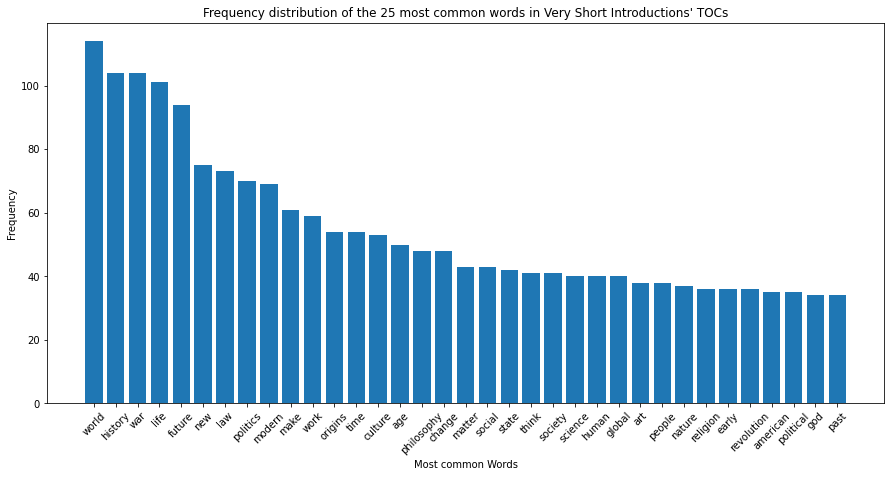

In [22]:
plt.figure(figsize=(15,7))
plt.bar(commons['Word'], commons['Frequency'])
plt.xticks(rotation = 45)
plt.xlabel('Most common Words')
plt.ylabel("Frequency")
plt.title("Frequency distribution of the 25 most common words in Very Short Introductions' TOCs")

plt.show()

In [47]:
# Check how many <br/>s are present in the TOC data
total_number_brs_from_ctrl_f = 7204
print("Average entries for each TOC:", 7204 / 707)
print("(Includes introductions, references, prefaces, further reading...)")

Average entries for each TOC: 10.18953323903819
(Includes introductions, references, prefaces, further reading...)


In [23]:
dt, do, dtoc = data['Title'], data['Overview'], data['nosingchar_TOC']

print("Titles, TOCs, Overviews with 'America': ",len(data[dt.str.contains("ameri")]),", ",
      len(data[dtoc.str.contains("ameri")]), ", ", len(data[do.str.contains("ameri")]))
print("Titles, TOCs, Overviews with 'Asia': ",len(data[dt.str.contains("asia")]),", ",
      len(data[dtoc.str.contains("asia")]), ", ", len(data[do.str.contains("asia")]))
print("Titles, TOCs, Overviews with 'Africa': ",len(data[dt.str.contains("afric")]),", ",
      len(data[dtoc.str.contains("afric")]), ", ", len(data[do.str.contains("afric")]))
print("Titles, TOCs, Overviews with 'Politics': ",len(data[dt.str.contains("politic")]),", ",
      len(data[dtoc.str.contains("politic")]), ", ", len(data[do.str.contains("politic")]))
print("Titles, TOCs, Overviews with 'History': ",len(data[dt.str.contains("hist")]),", ",
      len(data[dtoc.str.contains("hist")]), ", ", len(data[do.str.contains("hist")]))
print("Titles, TOCs, Overviews with 'Tech': ",len(data[dt.str.contains("tech")]),", ",
      len(data[dtoc.str.contains("tech")]), ", ", len(data[do.str.contains("tech")]))
print("Titles, TOCs, Overviews with 'Soci': ",len(data[dt.str.contains("soci")]),", ",
      len(data[dtoc.str.contains("soci")]), ", ", len(data[do.str.contains("soci")]))
print("Titles, TOCs, Overviews with 'Science': ",len(data[dt.str.contains("sci")]),", ",
      len(data[dtoc.str.contains("sci")]), ", ", len(data[do.str.contains("sci")]))
print("Titles, TOCs, Overviews with 'Geo': ",len(data[dt.str.contains("geo")]),", ",
      len(data[dtoc.str.contains("geo")]), ", ", len(data[do.str.contains("geo")]))
print("Titles, TOCs, Overviews with 'Bio': ",len(data[dt.str.contains("bio")]),", ",
      len(data[dtoc.str.contains("bio")]), ", ", len(data[do.str.contains("bio")]))
print("Titles, TOCs, Overviews with 'Reli': ",len(data[dt.str.contains("reli")]),", ",
      len(data[dtoc.str.contains("reli")]), ", ", len(data[do.str.contains("reli")]))

Titles, TOCs, Overviews with 'America':  27 ,  39 ,  53
Titles, TOCs, Overviews with 'Asia':  2 ,  7 ,  13
Titles, TOCs, Overviews with 'Africa':  4 ,  10 ,  11
Titles, TOCs, Overviews with 'Politics':  10 ,  81 ,  130
Titles, TOCs, Overviews with 'History':  32 ,  115 ,  297
Titles, TOCs, Overviews with 'Tech':  3 ,  23 ,  66
Titles, TOCs, Overviews with 'Soci':  8 ,  87 ,  155
Titles, TOCs, Overviews with 'Science':  13 ,  59 ,  155
Titles, TOCs, Overviews with 'Geo':  9 ,  17 ,  28
Titles, TOCs, Overviews with 'Bio':  14 ,  31 ,  57
Titles, TOCs, Overviews with 'Reli':  7 ,  44 ,  73


### Machine Modelling

A desirable AI companion would be a machine that is able to assist in generating ideas regarding TOC, or mental model structures. In essence then, an AI assist that is able to create or arrange concept structures on the fly.

Still further, unsupervised clustering can be used to discern categories to group these TOCs, whether in respect to semantic content, TOC structure, or otherwise. However, I'm waiting on Andrew Ng's new Unsupervised ML course, so I'm not going to do that right now. Instead, I've created a web application that simply outputs all the TOC data visually.

Limitations with this particular data experiment is the nature of the data: much if not all of the TOCs in the Very Short Introductions series are, or are otherwise presented in this dataset, as a flat 1-layer hierarchy. This certainly made for a simpler dataset to analyse for a first iteration, but it is not reflective of the desirable final data that should be given for a machine to model from. 

### Next Steps: 
1. Attain more nuanced TOC data, and from multiple sources
2. Analyse hierarchies and structures
3. Use unsupervised clustering to draw insights from TOC structures
4. Create AI to generate information structures based on TOCs